In [16]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

## BLAST: identifying genes encoded by 6 differentially expressed transcripts

1. The Six transcripts are found in the in the folder: <font color=green>megablast_hits</font> file: <font color=blue>uniquetranscripts.fasta</font>
2. We did a standard megablast using the nucleotide database for each of the 6 transcripts. 
3. Megablast hit results were downloaded for each transcript and are found in the folder: <font color=green>megablast_hits</font>
4. We wrote a shell script to select the top hit from each hit table found in the folder <font color=green>megablast_hits</font> called <font color=red>topHits.sh</font>
5. The shell script wrote a .fasta file called <font color=blue>topHits</font> in the folder <font color=green>megablast_hits</font>





## Search the NCBI protein database for amino acid sequences corresponding to these 6 transcripts. 

1. Protein searched for each of the top hitprotien names in the .fasta file called <font color=blue>topHits</font> in the folder <font color=green>megablast_hits</font>. Made sure to filter proteins for animals only and selected 10 protien sequences from closely related animals. 
2. These 6 .fasta files were saved in the folder called <font color=green>NCBI_protien_search_results</font>


## Translate RNA Seq Data
1. We wrote a python file called <font color=red>Translate_Updated_Final.py</font> located in the folder called <font color=green>RNA_seq_translation</font>
2. For each .fasta file in the directory the file translates the first reading frame starting at the start codon and ends at the stop codon. The translated sequences are thwn written to new .fasta files.
3. See notes in the python file for its specific use.

## HMM modeling

For the HMM modeling portion we created a bash script called <font color=red>proj_hmm_final.sh</font> located in the folder called <font color=green>NCBI_protien_search_results</font>. 
1. This shell script first aligned the downloaded .fasta protein sequences from the NCBI the original sequences found in <font color=green>NCBI_protien_search_results</font> and then saved new aligned .fasta files to the subfolder <font color=green>NCBI_protien_search_results/align</font>
2. The script then constructed 6 HMM protien models with hmmbuild and stored the .hmm models in the subfolder <font color=green>NCBI_protien_search_results/hmm</font>
3. The script then hmmsearched the 4 translated RNAseq .fasta files in <font color=green>RNA_seq_translation</font> with each of the 6 HMM protein models in <font color=green>NCBI_protien_search_results/hmm</font>. 
4. For each model a sequence hits file and a sequence hits table were generated and stored in the subdirectory <font color=green>NCBI_protien_search_results/hits_table</font>.

## Graph the expression levels and compare to Kuhns + Pluznick et al 2017 (K+P)
The python file to make the graphs is called <font color=red>expressionLevels.py</font> and is found in the directory <font color=green>expressionLevels</font>. The python file builds its graphs with tabular data in the subfolder <font color=green>NCBI_protien_search_results/hits_table</font> 

In [13]:
#load packages
import pandas as pd
from plotnine import *
import os

# change working directory
os.chdir("C:/Users/NicCage/Desktop/biocompute/YY_BioinformaticsGroup/NCBI_protien_search_results/hits_table")

# read in hmm search output files and add column names for ggplot
Transcript1 = pd.read_csv("1.sequences.table", sep=' ', header=None)
Transcript1.columns = ["Mouse", "Match sequence", "Score"]
Transcript2 = pd.read_csv("2.sequences.table", sep=' ', header=None)
Transcript2.columns = ["Mouse", "Match sequence", "Score"]
Transcript6 = pd.read_csv("6.sequences.table", sep=' ', header=None)
Transcript6.columns = ["Mouse", "Match sequence", "Score"]
Transcript8 = pd.read_csv("8.sequences.table", sep=' ', header=None)
Transcript8.columns = ["Mouse", "Match sequence", "Score"]
Transcript9 = pd.read_csv("9.sequences.table", sep=' ', header=None)
Transcript9.columns = ["Mouse", "Match sequence", "Score"]
Transcript10 = pd.read_csv("10.sequences.table", sep=' ', header=None)
Transcript10.columns = ["Mouse", "Match sequence", "Score"]

# Plot of Expression for each transcript based on mouse identity
expressionT1 = (ggplot(Transcript1,aes(x="Mouse"))
    +geom_bar(fill='red')
    +ggtitle("Gsta2")
    +ylab("Relative Expression")
    +theme_classic())
expressionT2 = (ggplot(Transcript2,aes(x="Mouse"))
    +geom_bar(fill='orange')
    +ggtitle("Scl7a12")
    +ylab("Relative Expression")
    +theme_classic())
expressionT6 = (ggplot(Transcript6,aes(x="Mouse"))
    +geom_bar(fill='yellow')
    +ggtitle("Ptpn5")
    +ylab("Relative Expression")
    +theme_classic())
expressionT8 = (ggplot(Transcript8,aes(x="Mouse"))
    +geom_bar(fill='green')
    +ggtitle("ATP12a")
    +ylab("Relative Expression")
    +theme_classic())
expressionT9 = (ggplot(Transcript9,aes(x="Mouse"))
    +geom_bar(fill='blue')
    +ggtitle("Lhx2")
    +ylab("Relative Expression")
    +theme_classic())
expressionT10 = (ggplot(Transcript10,aes(x="Mouse"))
    +geom_bar(fill='purple')
    +ggtitle("Synpr")
    +ylab("Relative Expression")
    +theme_classic())

### Gsta2
Relative expression decreased from control mice to obese mice, which matches the 
trend observed in K+P.

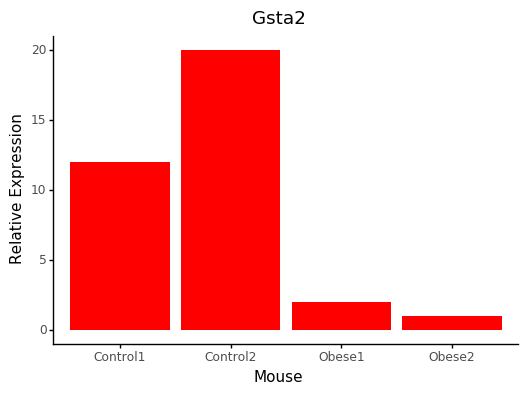

<ggplot: (17295231)>


In [17]:
print(expressionT1)

### Scl7a12
K+P reported a significant decrease of expression in obese mice. However, our data 
shows no qualitative difference between control and obese mice for this gene.

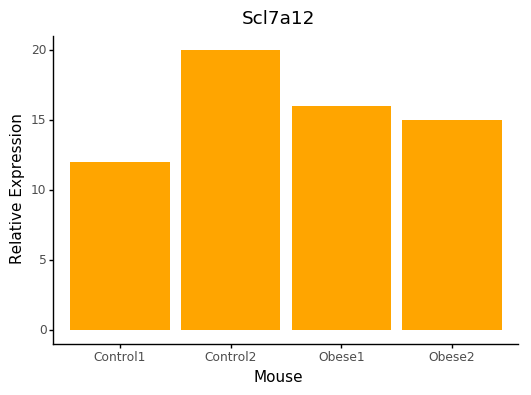

<ggplot: (14863487)>


In [18]:
print(expressionT2)

### Ptpn5
K+P found significant increase in obese mice, but our results show no qualitative 
difference between control and obese mice for this gene.

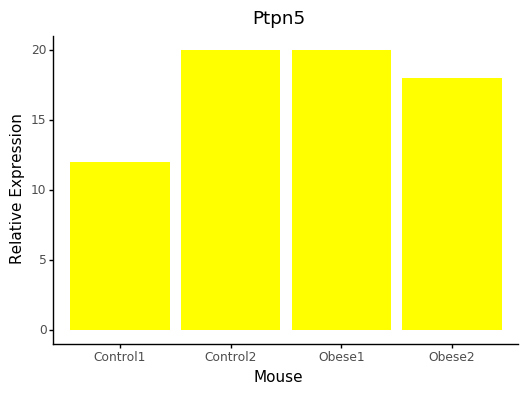

<ggplot: (17294582)>


In [19]:
print(expressionT6)

### Atp12a
Relative expression increased from control mice to obese mice, which matches the 
trend observed in K+P.

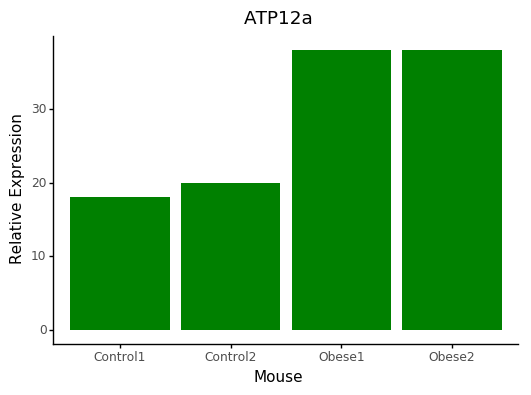

<ggplot: (17312874)>


In [20]:
print(expressionT8)

### Lhx2
Relative expression increased in obese mice. K+P found a significant increase in 
expression in obese mice as well.

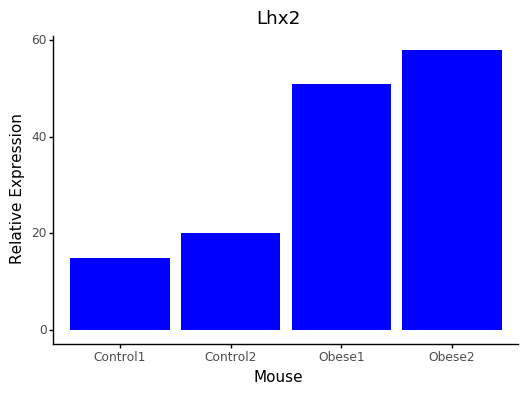

<ggplot: (17316780)>


In [21]:
print(expressionT9)

### Synpr
Relative expression greatly increased in obese mice compared to control mice. This 
is the same trend seen in K+P.

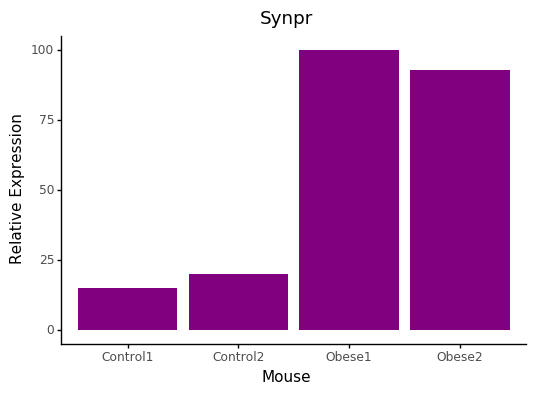

<ggplot: (14918271)>


In [22]:
print(expressionT10)